# Project: TMDB MOVIES Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

### Dataset Description 

> **brief**: This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
We will be using columns from the csv file attached which are :
<ul>
<li><a>ID</a></li>
<li><a>genres</a></li>
<li><a>release-date</a></li>
<li><a>vote-average</a></li>
<li><a>vote-count</a></li>
<li><a>release-year</a></li>
<li><a>popularity</a></li>
<li><a>Revenues adj</a></li>
<li><a>Budget adj</a></li>  
<li><a>Runtime</a></li> 
<li><a>Original title</a></li>     
</ul>  

In this report, I explore the following questions.
<ol>
<li><a> Does the movie's budget affect the movie's rating ?</a></li>
<li><a> What is the most watched genre ?</a></li>
</ol>    

In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import call
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
df=pd.read_csv('tmdb-movies.csv')

In [4]:
#getter method the dataframe and the column name
#to print the highest value with the movie's name
def getbest(data,col_name):
    print("Title :" ,df.original_title[0])
    print("This {} Is the highest value : ".format(col_name),data[col_name].max())

In [5]:
getbest(df,col_name='budget')

Title : Jurassic World
This budget Is the highest value :  425000000


In [6]:
df.index.name='Record'

In [7]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
Record,,,,,,,,,,,,,,,,,,,,,
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df.shape

(10866, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [10]:
#Now we let's look at a brief description of our data.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
> **brief**:In this part we will check for null values and duplicate values and handle them and drop any unnecessary columns that we won't be using in our analysis.
 

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

We will drop columns that we won't use in my analysis.

In [12]:
#dropping the unnecessary columns
df.drop(['cast','imdb_id','keywords','homepage','director','tagline','overview','production_companies'],axis=1,inplace=True)

In [13]:
#checking the changes.
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
Record,,,,,,,,,,,,,
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Then we will check for any null values in the remainning columns.

In [14]:
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

We will put a string saying blank for the null values.

In [15]:
#Filling missing values in genres with blank so we can use the rest of the column
df.genres.fillna(value='Blank',inplace=True)

In [16]:
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

Check for the amount of duplicates.

In [17]:
df.duplicated().sum()

1

Dropping the duplicates.

In [18]:
#We will just drop the duplicate values
duplicate = df[df.duplicated()]
print("Duplicate Rows :",duplicate)

Duplicate Rows :            id  popularity    budget  revenue original_title  runtime  \
Record                                                                 
2090    42194     0.59643  30000000   967000         TEKKEN       92   

                                             genres release_date  vote_count  \
Record                                                                         
2090    Crime|Drama|Action|Thriller|Science Fiction      3/20/10         110   

        vote_average  release_year  budget_adj  revenue_adj  
Record                                                       
2090             5.0          2010  30000000.0     967000.0  


In [19]:
df.drop_duplicates(keep='first', inplace=True)

# <a id='eda'></a>
# Exploratory Data Analysis

## Does the movie's budget affect the movie's rating ?

We will make a relation between movies's budget and vote's average.

In [20]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
median = df['vote_average'].median()
low = df.query('vote_average < {}'.format(median))
high = df.query('vote_average >= {}'.format(median))

mean_rating_low = low['vote_average'].mean()
mean_rating_high = high['vote_average'].mean()

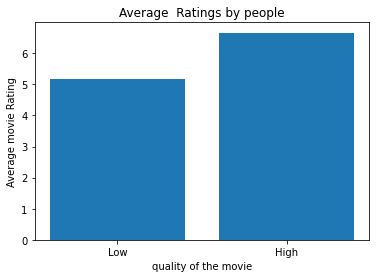

In [21]:
locations = [1, 2]
heights = [mean_rating_low, mean_rating_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average  Ratings by people')
plt.xlabel('quality of the movie')
plt.ylabel('Average movie Rating');

In [22]:
df.groupby(['budget','vote_average']).max()

id  popularity     revenue  \
budget    vote_average                                   
0         1.5            25055    0.121120           0   
          2.0           120846    0.079281           0   
          2.1            83896    0.159707     9109322   
          2.2           203351    0.041297           0   
          2.3            19157    0.209701           0   
...                        ...         ...         ...   
270000000 5.3             1452    1.957331   391081192   
280000000 7.4            99861    5.944927  1405035767   
300000000 6.8              285    4.965391   961000000   
380000000 6.3             1865    4.955130  1021683000   
425000000 6.4            46528    0.250540    11087569   

                                                     original_title  runtime  \
budget    vote_average                                                         
0         1.5                                         Transmorphers       86   
          2.0                                        Jurassic Shark       75   
          2.1                          Superbabies: Baby Geniuses 2       95   
          2.2                                           The Sleeper       90   
          2.3                                       Going Overboard       99   
...                                                             ...      ...   
270000000 5.3                                      Superman Returns      154   
280000000 7.4                               Avengers: Age of Ultron      141   
300000000 6.8              Pirates of the Caribbean: At World's End      169   
380000000 6.3           Pirates of the Caribbean: On Stranger Tides      136   
425000000 6.4                                     The Warrior's Way      100   

                                                           genres  \
budget    vote_average                                              
0         1.5                    Action|Adventure|Science Fiction   
          2.0                       Action|Horror|Science Fiction   
          2.1                              Horror|Science Fiction   
          2.2                              Horror|Comedy|Thriller   
          2.3                              Horror|Science Fiction   
...                                                           ...   
270000000 5.3            Adventure|Fantasy|Action|Science Fiction   
280000000 7.4                    Action|Adventure|Science Fiction   
300000000 6.8                            Adventure|Fantasy|Action   
380000000 6.3                            Adventure|Action|Fantasy   
425000000 6.4           Adventure|Fantasy|Action|Western|Thriller   

                       release_date  vote_count  release_year    budget_adj  \
budget    vote_average                                                        
0         1.5               6/26/07          10          2007  0.000000e+00   
          2.0               9/21/12          13          2012  0.000000e+00   
          2.1               8/27/04          30          2011  0.000000e+00   
          2.2                7/9/13          21          2013  0.000000e+00   
          2.3                8/9/04          18          2004  0.000000e+00   
...                             ...         ...           ...           ...   
270000000 5.3               6/28/06         834          2006  2.920507e+08   
280000000 7.4               4/22/15        4304          2015  2.575999e+08   
300000000 6.8               5/19/07        2626          2007  3.155006e+08   
380000000 6.3               5/11/11        3180          2011  3.683713e+08   
425000000 6.4               12/2/10          74          2010  4.250000e+08   

                         revenue_adj  
budget    vote_average                
0         1.5           0.000000e+00  
          2.0           0.000000e+00  
          2.1           1.051621e+07  
          2.2           0.000000e+00  
          2.3           0.000000e+00  
...                              

We can conclude from the graph and the table above that with a low-budget film you most probably would get a bad vote rating.

# What is the most watched genre ?
Between comedy , action and horror.

we will make a relation between popularity and the genre type .we will try to compare themost watched genre and i think it would be either action,comedy or horror.

In [23]:
#so we will make a query for the number of movies that are action 
# and have a popularity >6
dfa = df.query('popularity > 6.0' and 'genres == "Action"' )
dfa.shape[0]

63

In [24]:
#so we will make a query for the number of movies that are action 
# and have a popularity >6

dfc = df.query('popularity > 6.0'  and 'genres =="Comedy"' )
dfc.shape[0]

712

In [25]:
#so we will make a query for the number of movies that are action 
# and have a popularity >6

dfh=df.query('popularity > 6.0'  and 'genres =="Horror"' )
dfh.shape[0]

253

In [26]:
dfcmpr=dfa.append(dfc).append(dfh)

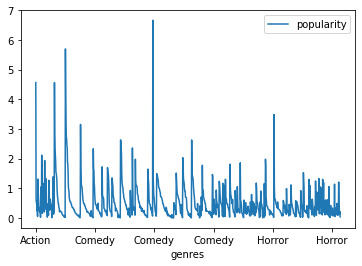

In [27]:
#the X-axis will represent the genre.
#the Y-axis will represent the popularity.
dfcmpr.plot(x='genres',y='popularity',kind='line');

From the line chart above we can conclude that comedy is the more popular than action
comedy>horror>action

In [28]:
df.groupby(['popularity','genres']).max()

,,id,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,genres,,,,,,,,,,,
0.000065,Drama|History|Western,18729,0,0,"North and South, Book I",561,11/3/85,17,6.0,1985,0.000000e+00,0.000000e+00
0.000188,Mystery|Comedy|Drama,32082,0,0,The Hospital,103,12/14/71,10,6.4,1971,0.000000e+00,0.000000e+00
0.000620,Comedy,174323,0,0,G.B.F.,92,10/20/13,82,6.1,2013,0.000000e+00,0.000000e+00
0.000973,Comedy|Mystery,31329,0,0,Mon petit doigt m'a dit...,105,4/13/05,13,5.7,2005,0.000000e+00,0.000000e+00
0.001115,Comedy,15412,0,0,Khosla Ka Ghosla!,135,9/22/06,10,6.8,2006,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
13.112507,Adventure|Science Fiction|Thriller,262500,110000000,295238201,Insurgent,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
14.311205,Action|Science Fiction|Adventure,118340,170000000,773312399,Guardians of the Galaxy,121,7/30/14,5612,7.9,2014,1.565855e+08,7.122911e+08
24.949134,Adventure|Drama|Science Fiction,157336,165000000,621752480,Interstellar,169,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08


Some blockbuster movies which score a high popularity score ,They act like outliers so we that's why we looked at the number of movies of the 3 choosen movies not on the best scoring movies.

# <a id='conclusions'></a>
## Conclusions

> **observations**: Genrally a movie with a higher budget gets a better vote rating but there are many other factors that affects the rating like a movie series which has a really strong fanbase i.e Marvel .
Also a movie which follows the action,adventure genre is more popular than the other genres.
Comedy movies are more popular than action and horror movies.
### Limitations
>   the Genres column had null values bit iwanted to use the column so i used a function to put a string which is the word Blank to fill the null values.

In [29]:
# from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1